# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns
%matplotlib inline

# Curating Data

In [2]:
master_dataframe = pd.DataFrame(columns=['Retail Sales', 'Population', 'Festivals'],
                                index = pd.date_range(start = '01/01/2009', end = '12/01/2018', freq='1MS'))

## Curating Retail Data

### Retail Trend

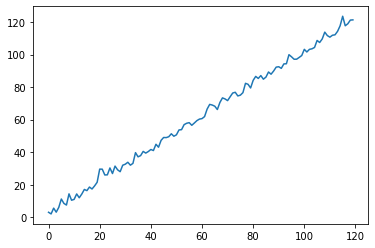

In [3]:
retail_trend = np.abs(np.random.normal(0,1,120))*3 + np.arange(0,120)
plt.plot(retail_trend)

### Retail Seasonality  - Distributed

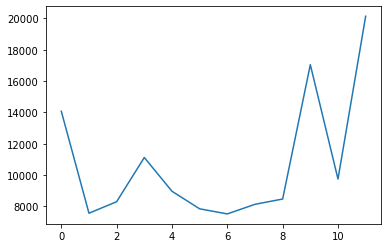

In [8]:
festiv_months = [1,4,10,12]
mean_sales_across_months = [8000]*12
cyclic_increments = [6000,3000,9000,12000]

j=0
for i in range(12):
    
    if i+1 in festiv_months:
        mean_sales_across_months[i] += cyclic_increments[j] + (np.random.normal(0,1,1)*100)[0]
        j += 1
    else:
         mean_sales_across_months[i] += (np.random.normal(0,1,1)*1000)[0]

plt.plot(mean_sales_across_months)


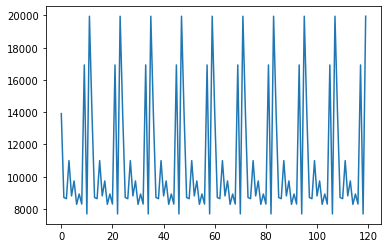

In [7]:
retail_seasonality = mean_sales_across_months*10
plt.plot(retail_seasonality)

### Retail Seasonality - Smooth

In [9]:
seasonality = (np.sin(np.arange(12))+1000)

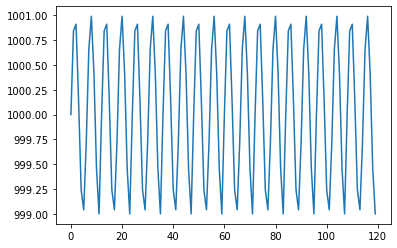

In [10]:
complete_seasonality = list(seasonality)*10
plt.plot(complete_seasonality)

### Retail - Random Noise

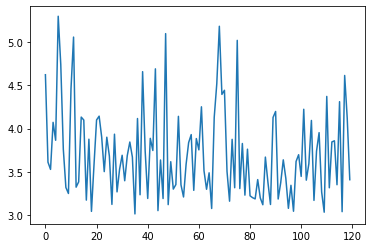

In [11]:
np.random.seed(1)
retail_noise = np.abs(np.random.normal(loc=0.0, scale=1, size=120))+3
plt.plot(retail_noise)

### Complete Series

In [12]:
retails = retail_seasonality*retail_trend*retail_noise
retails = retails/100 # Series Adjustment
retails = np.round(retails)

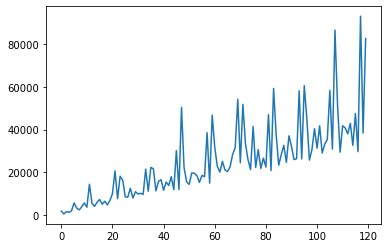

In [13]:
plt.plot(retails)

## Festivals Series

In [14]:
festivals = [2, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 4]*10

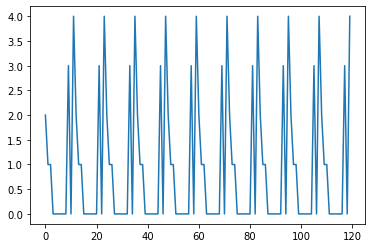

In [15]:
plt.plot(festivals)

## Population Series

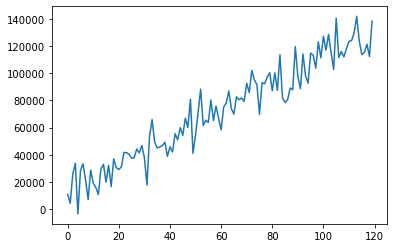

In [16]:
population = 10000 + (np.arange(1,121) + np.random.normal(0,1,120)*10)*1000
plt.plot(population)

# Master Dataframe

In [17]:
master_dataframe['Retail Sales'] = retails
master_dataframe['Population'] = population
master_dataframe['Festivals'] = festivals

In [18]:
master_dataframe.iloc[60:72]

,Retail Sales,Population,Festivals
2014-01-01,31664.0,58274.412448,2
2014-02-01,22917.0,75135.477205,1
2014-03-01,20165.0,78031.848134,1
2014-04-01,25154.0,86932.258825,0
2014-05-01,21192.0,73895.529736,0
2014-06-01,20437.0,69826.379363,0
2014-07-01,22662.0,82627.610966,0
2014-08-01,28456.0,80407.370922,0
2014-09-01,31588.0,81806.650771,0
2014-10-01,54131.0,79268.872963,3


# Plotting

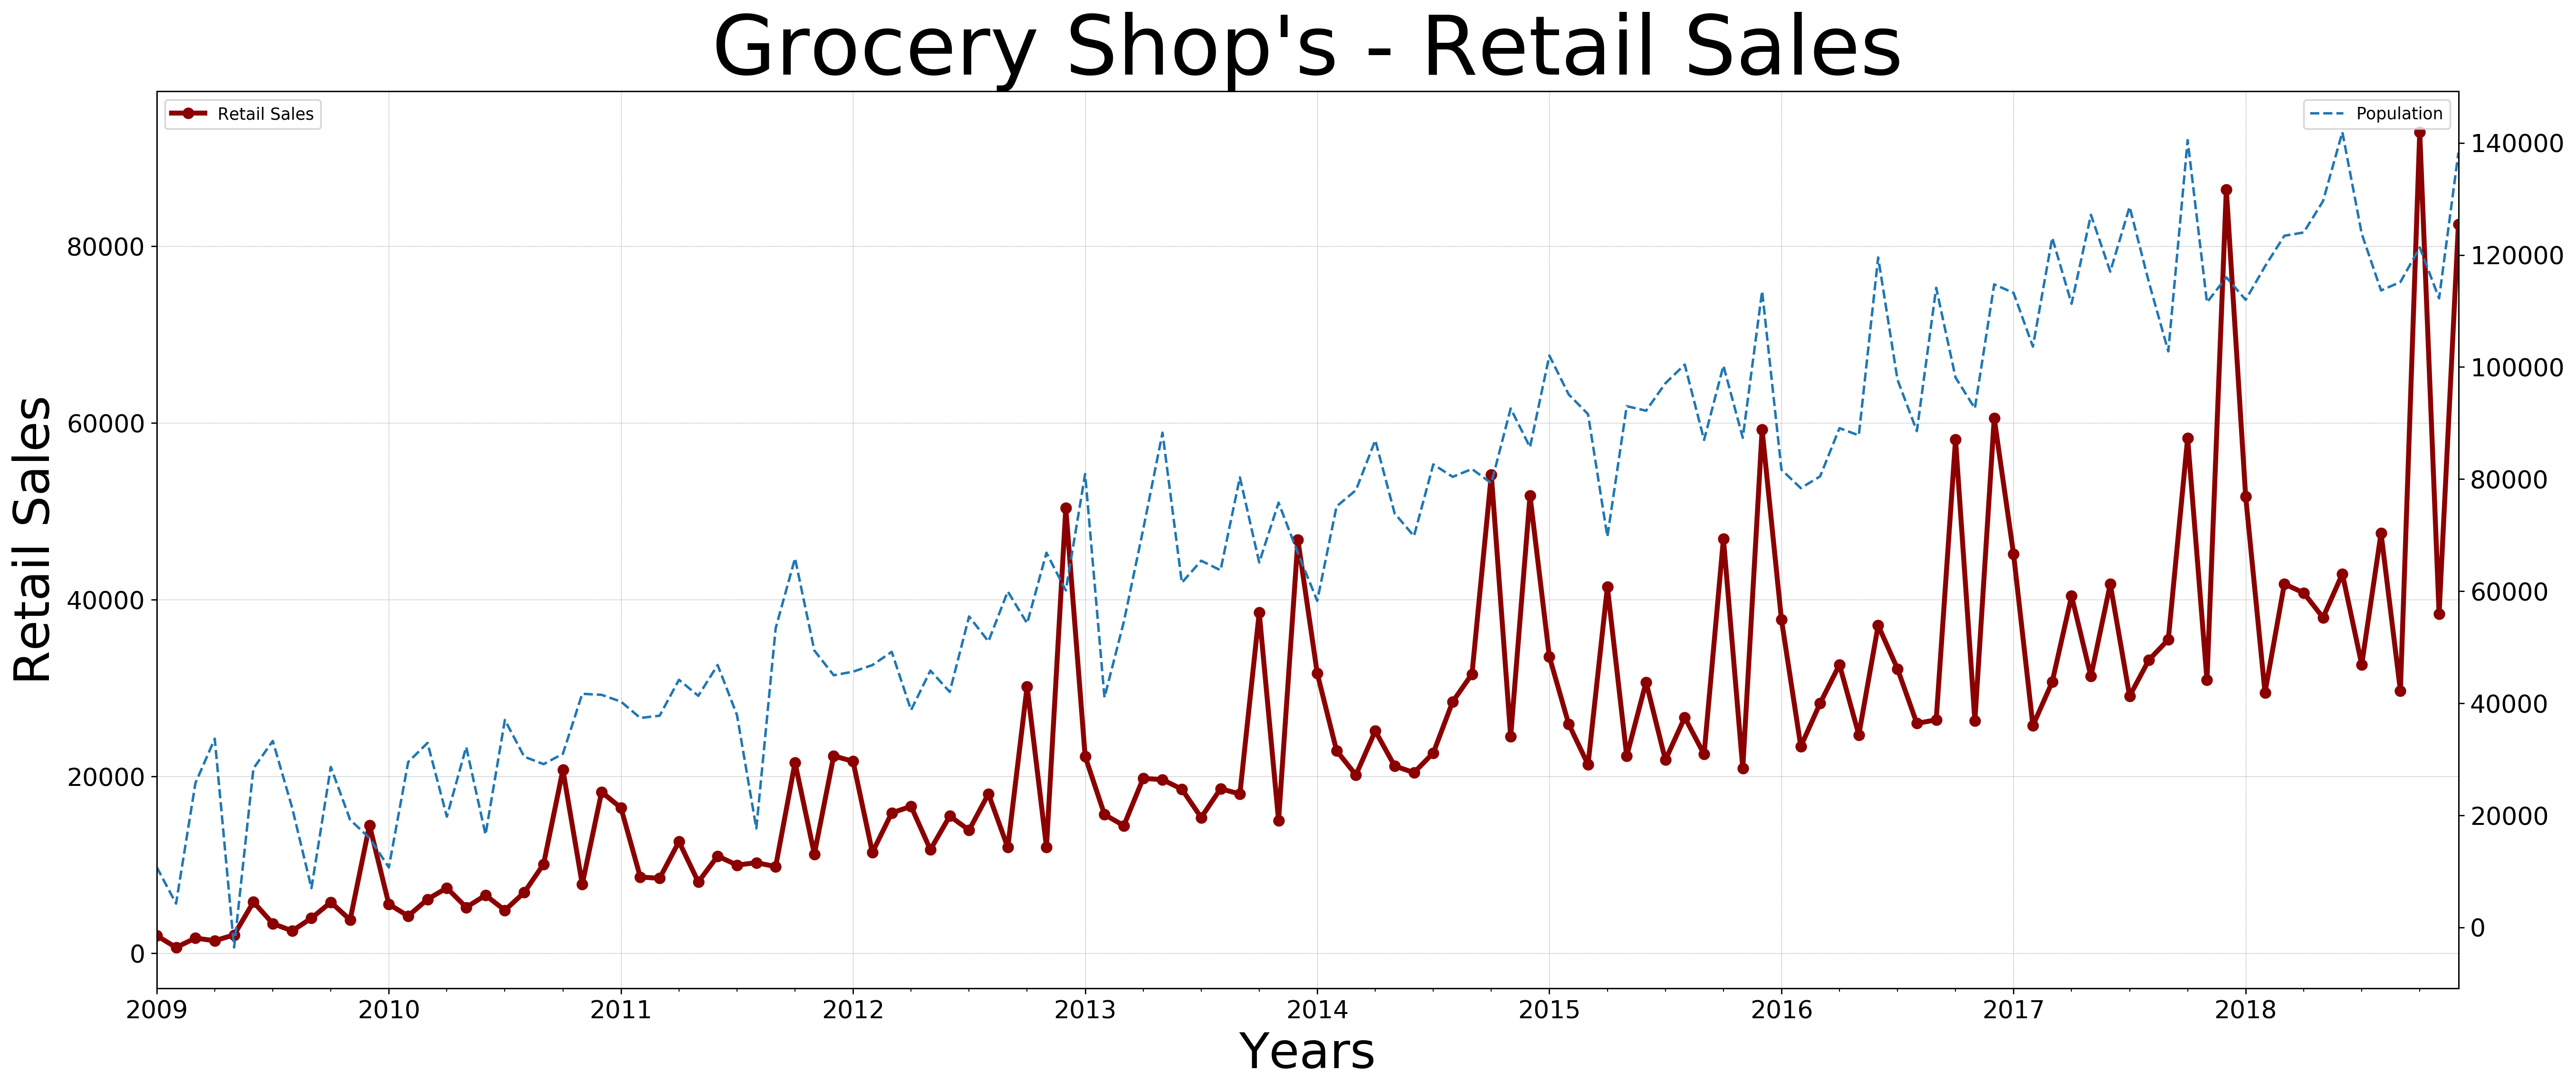

In [20]:
fig, ax1 = plt.subplots()

master_dataframe[['Retail Sales']].plot(figsize=(250,100), ax =ax1, c ='darkred', marker = 'o', lw = 3)

plt.rcParams['figure.dpi'] = 250
plt.title("Grocery Shop's - Retail Sales",fontsize=50) 
plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.2)
plt.grid(b=None)
plt.xlabel('Years',fontsize=30)
plt.ylabel('Retail Sales',fontsize=30)
plt.grid()
plt.tick_params(labelsize=15)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
master_dataframe[['Population']].plot(figsize=(25,10), ax =ax2, linestyle = '--')
plt.tick_params(labelsize=15)
ax2.legend(loc=0)
plt.savefig('plt1.png')

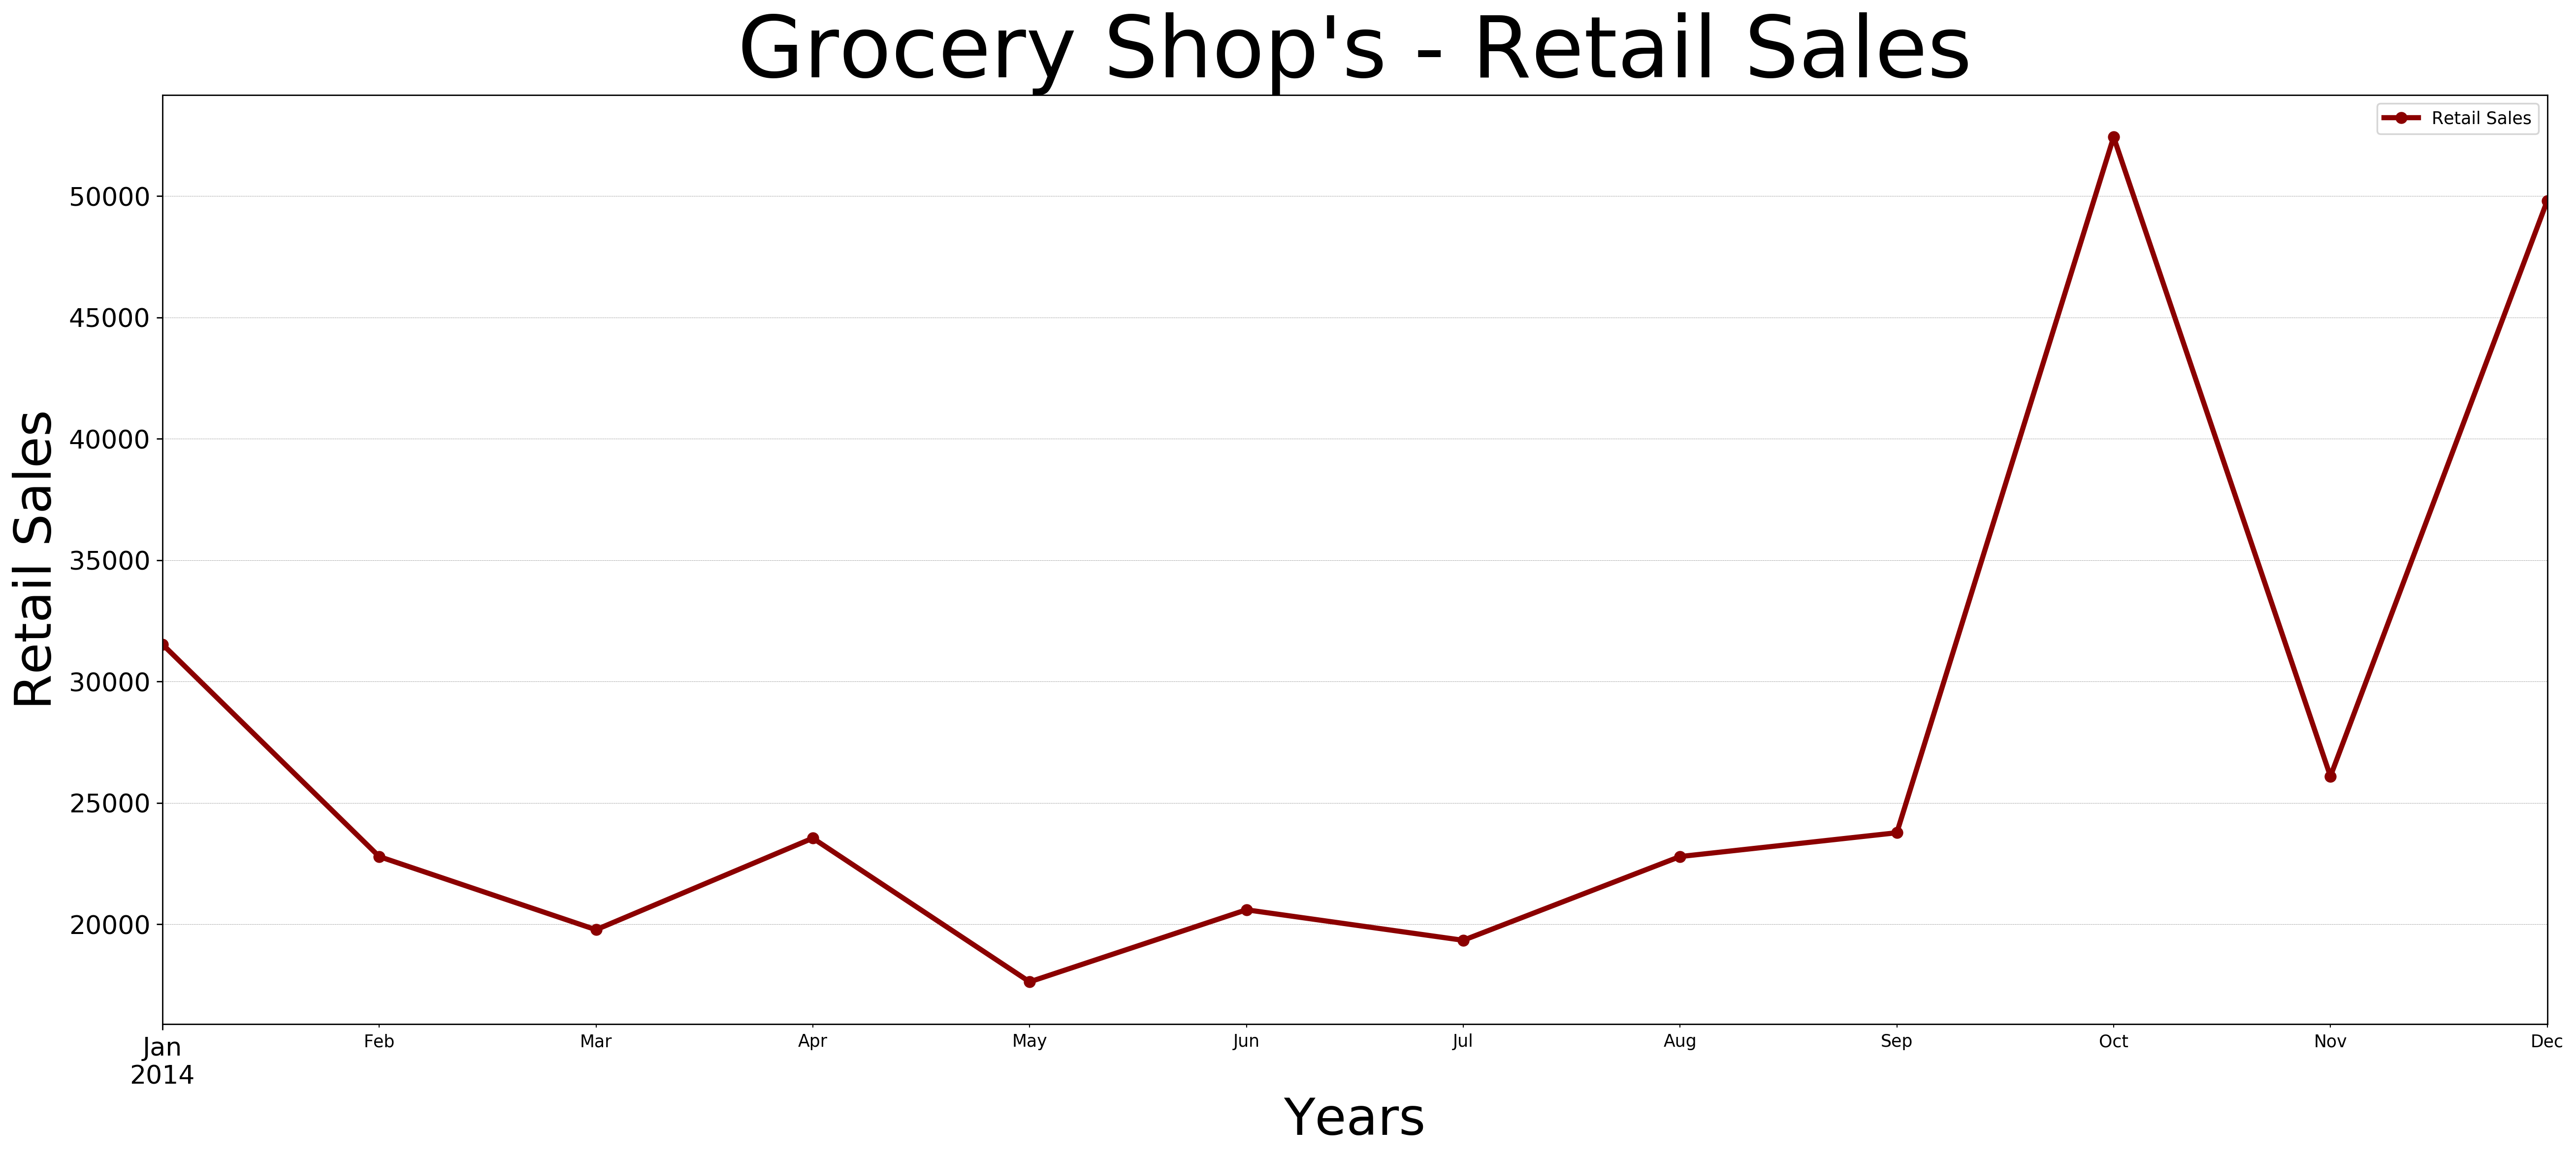

In [274]:
master_dataframe.iloc[60:72][['Retail Sales']].plot(figsize=(25,10), c ='darkred', marker = 'o', lw = 3)


plt.title("Grocery Shop's - Retail Sales",fontsize=50) 
plt.grid(axis='both', color='gray', linestyle='--', linewidth=0.2)
plt.grid(b=None)
plt.xlabel('Years',fontsize=30)
plt.ylabel('Retail Sales',fontsize=30)
plt.grid()
plt.tick_params(labelsize=15)
ax1.legend(loc='upper left')

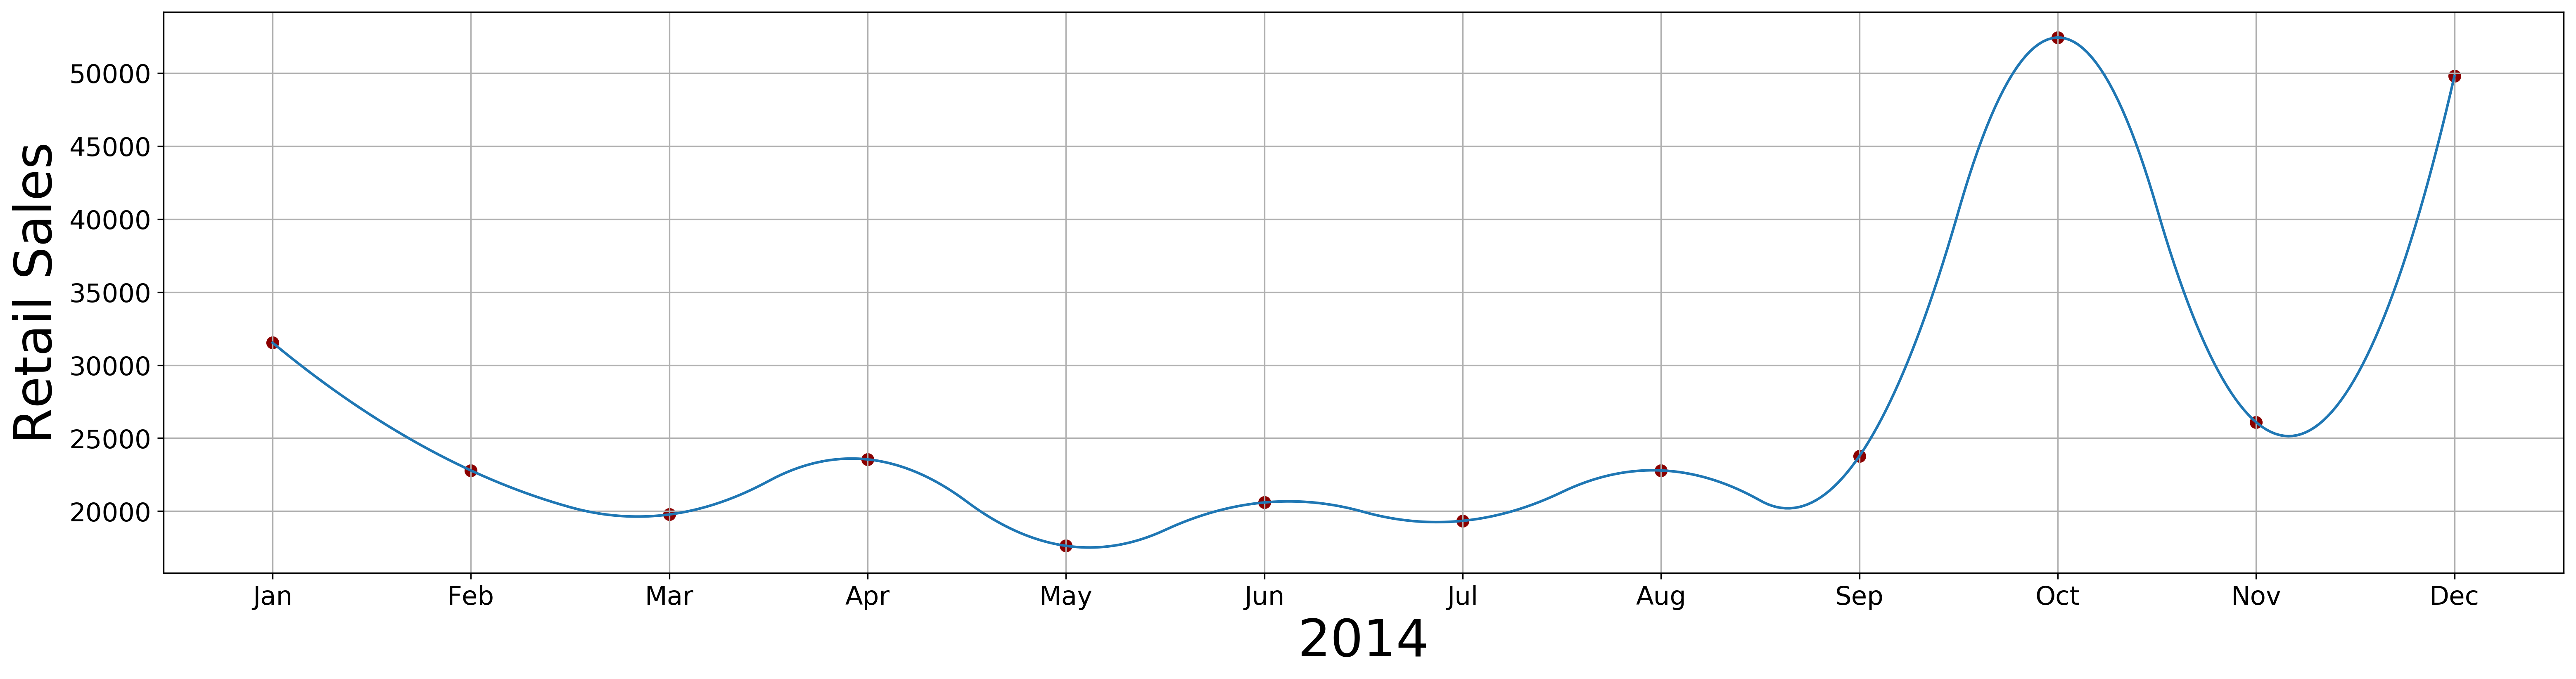

In [316]:
x=np.arange(1, 13)
y=np.array(master_dataframe.iloc[60:72]['Retail Sales'].tolist())

x_new = np.linspace(x.min(), x.max(),500)

f = interp1d(x, y, kind='quadratic')
y_smooth=f(x_new)

fig, ax1 = plt.subplots()

tempDf = master_dataframe.iloc[60:72][['Retail Sales']].reset_index()
tempDf['index'] = np.arange(1,13)
tempDf.plot('index', 'Retail Sales', kind = 'scatter',
            figsize=(25,6),c ='darkred', marker = 'o',
            lw = 3, ax = ax1)
plt.rcParams['figure.dpi'] = 500
ax1 = plt.plot(x_new,y_smooth)
_ticks = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
ticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(_ticks, ticklabels)
plt.xlabel('2014',fontsize=30)
plt.ylabel('Retail Sales',fontsize=30)
plt.tick_params(labelsize=15)
# plt.title('Retail Sales @ 2014', fontsize = 40)
plt.grid()